In [39]:
import numpy as np
import pandas as pd

In [40]:
ds = pd.read_csv('datatool.csv')

ds.head()

,Lead time,Setup cost,Cost per part,Degree of freedom,Volume,Cycle Time,Manufacturing processess for plastic
0,0.2,1,3,3,1000,4,3D printing
1,2.0,2,4,2,5000,4,CNC machining
2,1.0,1,2,3,1000,5,Polymer casting
3,6.0,3,1,2,5000,3,Rotational Molding
4,66.0,5,4,1,7000,2,Vacuum Forming


In [41]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

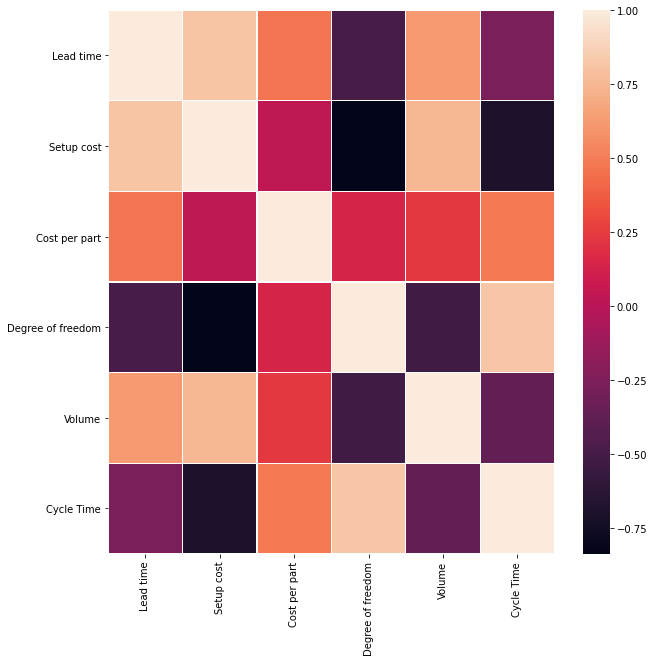

In [42]:
plt.figure(figsize=(10, 10))
fig = sns.heatmap(ds.corr(),linewidths=.1)
plt.show()

In [43]:
X = ds.iloc[:,:-1].values
Y = ds.iloc[:,-1].values

In [44]:
print (X,Y)

[[2.0e-01 1.0e+00 3.0e+00 3.0e+00 1.0e+03 4.0e+00]
 [2.0e+00 2.0e+00 4.0e+00 2.0e+00 5.0e+03 4.0e+00]
 [1.0e+00 1.0e+00 2.0e+00 3.0e+00 1.0e+03 5.0e+00]
 [6.0e+00 3.0e+00 1.0e+00 2.0e+00 5.0e+03 3.0e+00]
 [6.6e+01 5.0e+00 4.0e+00 1.0e+00 7.0e+03 2.0e+00]
 [1.0e+01 3.0e+00 1.0e+00 2.0e+00 5.0e+03 1.0e+00]
 [4.0e+00 3.0e+00 1.0e+00 1.0e+00 1.0e+03 1.0e+00]
 [6.0e+00 3.0e+00 1.0e+00 1.0e+00 5.0e+03 1.0e+00]] ['3D printing' 'CNC machining' 'Polymer casting' 'Rotational Molding'
 'Vacuum Forming' 'Injection Molding' 'Extrusion' 'Blow molding']


In [45]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [46]:
sc = StandardScaler()
mm = MinMaxScaler()

In [47]:
X_stand = sc.fit_transform(X)

In [48]:
X_minmax = mm.fit_transform(X)

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_stand, Y, test_size=0.2, random_state=2)

In [53]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_minmax, Y, test_size=0.2, random_state=2)

In [54]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression


In [55]:
lgs = LogisticRegression()
lgs.fit(X_train1, Y_train1)
lgs.score(X_train1, Y_train1)

1.0

In [56]:
#predict = lgs.predict(['leadtime', 'setupcost','costperpart', 'degreeoffreedom', 'volume', 'cycletime'])

print(lgs.predict([[6,2,1,2,4000,1]]))

[6]


In [57]:
lgmm = LogisticRegression()
lgmm.fit(X_train2, Y_train2)
lgmm.score(X_train2, Y_train2)

1.0

In [60]:
#predict = lgs.predict(['leadtime', 'setupcost','costperpart', 'degreeoffreedom', 'volume', 'cycletime'])
print(lgmm.predict([[6,2,1,2,4000,1]]))

[6]
